Hello James!

My name is Dmitry.  I'm glad to review your work today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Supervised Learning Project

# Introduction:
- In this project, I create a classification model that predicts whether a customer will leave Beta Bank.
- The dataset 'Churn.csv' includes 13 features. These are used to train a classification model that predicts whether the target ('Exited') is true or false. Of the included features, 10 are used to train the models. Both categorical and numerical features are used. Categorical features are encoded while numerical features are scaled.
- There is a class imbalance for the target feature. About 80% of the dataset contains false (0) target values, meaning that most of the customers in the sample did not leave the bank.
- I train 4 models (Logistic Regression, Decision Tree, Random Forest and Gradient Boosting) and select the most optimized model through hyperparameter tuning and up/downsampling.
- The threshold for the model f1 value is set at 0.59.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great start with an introduction!
</div>

###  Load and Prepare Data:

#### Import Libraries/Modules

In [487]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.utils import shuffle

#### Load dataset as DataFrame

In [488]:
try:
    df = pd.read_csv('Churn.csv')
except FileNotFoundError:
    df =  pd.read_csv('/datasets/Churn.csv')

#### Examine dataset

In [489]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Several of the rows pertaining to personal info (Surname, CustomerId) can be eliminated since they are not useful in prediction.

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [491]:
df['Tenure'].isna().sum()

909

Nearly 1/10th of values in the Tenure column are missing.

In [492]:
df['Tenure'].value_counts(dropna=False)

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

The range is from 0.0 to 10.0. 

In a banking context, tenure is the period (years) for the maturation of a fixed deposit. It is possible that some customers have made no fixed deposit. Missing values may indicate that the customer does not have a product that involves tenure. Therefore, I replace missing values with '0.0'.

In [493]:
df[df['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [494]:
df['Tenure'].fillna(0.0,inplace=True)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct.
</div>

In [495]:
df['Tenure'].isna().sum()

0

In [496]:
df['CustomerId'].duplicated().sum()

0

There are no duplicates of the unique 'CustomerId' column. We can be reasonably sure that no accounts were duplicated in the data.

#### Eliminate unnecessary columns

Since the following columns contain personal data not relevant to the classification task, they are removed from the dataset.

In [497]:
cols = ['RowNumber','CustomerId','Surname',]
df.drop(cols,axis=1,inplace=True)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great preprocessing!
</div>

#### Separate data into target and features

In [498]:
features = df.drop('Exited',axis=1)
target = df['Exited']

#### Separate data into train, valid and test

In [499]:
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.2,random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train,target_train,test_size=0.25,random_state=12345)

Data is separated into the train, validation and test sets by a 3:1:1 ratio. Leaving us with a train set of 6000 rows, and validation and test sets of 2000 rows each.

#### Scale numeric features

In [500]:
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_27/1037083430.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Scaling gives the numeric features equal weight and increases the models ability to identify the most important features.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good preparation.
</div>

### Train Models:

#### Logistic Regression

##### Encode Categorical Features

In [501]:
ohe_features_train = pd.get_dummies(features_train,drop_first=True)
ohe_features_valid = pd.get_dummies(features_valid,drop_first=True)
ohe_features_test = pd.get_dummies(features_test,drop_first=True)

For the logistic regression model, I encode categorical features with one hot encoder.

##### Train Model

In [502]:
logr_model = LogisticRegression(solver='liblinear',random_state=12345)
logr_model.fit(ohe_features_train,target_train)

LogisticRegression(random_state=12345, solver='liblinear')

##### Validation 

In [503]:
predicted_valid = logr_model.predict(ohe_features_valid)

In [504]:
matrix = confusion_matrix(target_valid,predicted_valid)
matrix

array([[1551,   58],
       [ 310,   81]])

In [505]:
f1 = f1_score(target_valid,predicted_valid)
f1

0.3056603773584906

#### Decision Tree

##### Encode Categorical Features

In [506]:
encoder = OrdinalEncoder()
encode_features_train = pd.DataFrame(encoder.fit_transform(features_train),columns=features_train.columns)
encode_features_valid = pd.DataFrame(encoder.fit_transform(features_valid),columns=features_valid.columns)
encode_features_test = pd.DataFrame(encoder.fit_transform(features_test),columns=features_test.columns)

For the next 3 models (since they are tree models) I encode categorical features with the OrdinalEncoder object.

##### Train Model

In [507]:
best_tree_model = None
best_tree_score = 0
for depth in range(2,10):
    tree_model = DecisionTreeClassifier(max_depth=depth,random_state=12345)
    tree_model.fit(encode_features_train,target_train)
    predicted_valid = tree_model.predict(encode_features_valid)
    f1 = f1_score(target_valid,predicted_valid)
    print(f'depth:{depth} f1:{f1}')
    if f1 > best_tree_score:
        best_tree_model = tree_model
        best_tree_score = f1
print(f'best_model:{best_tree_model} best_score:{best_tree_score}')
tree_model = best_tree_model

depth:2 f1:0.5037037037037037
depth:3 f1:0.39382239382239387
depth:4 f1:0.42585551330798477
depth:5 f1:0.5150501672240801
depth:6 f1:0.4888123924268503
depth:7 f1:0.5074135090609555
depth:8 f1:0.5298621745788668
depth:9 f1:0.496124031007752
best_model:DecisionTreeClassifier(max_depth=8, random_state=12345) best_score:0.5298621745788668


The best max depth of the tree in a range of 2-9 is 8.

##### Validation

In [508]:
predicted_valid = tree_model.predict(encode_features_valid)

In [509]:
matrix = confusion_matrix(target_valid,predicted_valid)
matrix

array([[1520,   89],
       [ 218,  173]])

In [510]:
f1 = f1_score(target_valid,predicted_valid)
f1

0.5298621745788668

#### Random Forest

##### Train Model

In [511]:
best_forest_model = None
best_forest_score = 0
for depth in range(2,15):
    for est in range(10,100,10):
        forest_model = RandomForestClassifier(n_estimators=est,max_depth=depth,random_state=12345)
        forest_model.fit(encode_features_train,target_train)
        predicted_valid = forest_model.predict(encode_features_valid)
        f1 = f1_score(target_valid,predicted_valid)
        print(f'depth:{depth},n_est:{est} f1:{f1}')
        if f1 > best_forest_score:
            best_forest_model = forest_model
            best_forest_score = f1
print(f'best_model:{best_forest_model} best_score:{best_forest_score}')
forest_model = best_forest_model

depth:2,n_est:10 f1:0.11031175059952038
depth:2,n_est:20 f1:0.18433179723502302
depth:2,n_est:30 f1:0.17633410672853828
depth:2,n_est:40 f1:0.18433179723502302
depth:2,n_est:50 f1:0.1639344262295082
depth:2,n_est:60 f1:0.15925058548009366
depth:2,n_est:70 f1:0.16744186046511628
depth:2,n_est:80 f1:0.16744186046511628
depth:2,n_est:90 f1:0.16783216783216784
depth:3,n_est:10 f1:0.2331838565022422
depth:3,n_est:20 f1:0.24833702882483366
depth:3,n_est:30 f1:0.2560706401766004
depth:3,n_est:40 f1:0.22171945701357468
depth:3,n_est:50 f1:0.22171945701357468
depth:3,n_est:60 f1:0.23024830699774265
depth:3,n_est:70 f1:0.21818181818181817
depth:3,n_est:80 f1:0.2222222222222222
depth:3,n_est:90 f1:0.21004566210045664
depth:4,n_est:10 f1:0.45735027223230484
depth:4,n_est:20 f1:0.43856332703213613
depth:4,n_est:30 f1:0.4364326375711575
depth:4,n_est:40 f1:0.47723132969034604
depth:4,n_est:50 f1:0.4725274725274725
depth:4,n_est:60 f1:0.45555555555555555
depth:4,n_est:70 f1:0.43129770992366406
depth:

The best model had a max depth of 12 and 60 estimators.

##### Validation

In [512]:
predicted_valid = forest_model.predict(encode_features_valid)

In [513]:
matrix = confusion_matrix(target_valid,predicted_valid)
matrix

array([[1569,   40],
       [ 239,  152]])

In [514]:
f1 = f1_score(target_valid,predicted_valid)
f1

0.5214408233276158

A clear improvement over the last 2 models, but still below the desired threshold.

#### Gradient Boosting Classifier

##### Train Model

In [515]:
best_boost_model = None
best_boost_score = 0
for depth in range(2,10):
    for est in range(10,100,10):
        boost_model = GradientBoostingClassifier(n_estimators=est,max_depth=depth,random_state=12345)
        boost_model.fit(encode_features_train,target_train)
        predicted_valid = boost_model.predict(encode_features_valid)
        f1 = f1_score(target_valid,predicted_valid)
        print(f'depth:{depth},n_est:{est} f1:{f1}')
        if f1 > best_boost_score:
            best_boost_model = boost_model
            best_boost_score = f1
print(f'best_model:{best_boost_model} best_score:{best_boost_score}')
boost_model = best_boost_model

depth:2,n_est:10 f1:0.2027027027027027
depth:2,n_est:20 f1:0.493006993006993
depth:2,n_est:30 f1:0.5060240963855422
depth:2,n_est:40 f1:0.5144804088586031
depth:2,n_est:50 f1:0.528428093645485
depth:2,n_est:60 f1:0.5275459098497496
depth:2,n_est:70 f1:0.5266666666666667
depth:2,n_est:80 f1:0.5306799336650083
depth:2,n_est:90 f1:0.5322314049586776
depth:3,n_est:10 f1:0.403960396039604
depth:3,n_est:20 f1:0.49016100178890876
depth:3,n_est:30 f1:0.5174825174825175
depth:3,n_est:40 f1:0.5078809106830122
depth:3,n_est:50 f1:0.5172413793103449
depth:3,n_est:60 f1:0.5144804088586031
depth:3,n_est:70 f1:0.5195246179966045
depth:3,n_est:80 f1:0.5211505922165821
depth:3,n_est:90 f1:0.5211505922165821
depth:4,n_est:10 f1:0.45283018867924535
depth:4,n_est:20 f1:0.5
depth:4,n_est:30 f1:0.517361111111111
depth:4,n_est:40 f1:0.5103448275862068
depth:4,n_est:50 f1:0.5077720207253885
depth:4,n_est:60 f1:0.5121107266435986
depth:4,n_est:70 f1:0.5172413793103449
depth:4,n_est:80 f1:0.5180102915951973
dep

##### Validation

In [516]:
predicted_valid = boost_model.predict(encode_features_valid)

In [517]:
matrix = confusion_matrix(target_valid,predicted_valid)
matrix

array([[1556,   53],
       [ 230,  161]])

In [518]:
f1 = f1_score(target_valid,predicted_valid)
f1

0.5322314049586776

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

### Improve Model Quality:

#### Identify Class Imbalance

In [519]:
target_train.value_counts(normalize=True)

0    0.796833
1    0.203167
Name: Exited, dtype: float64

Nearly 80% of customers did not leave the bank. This is a significant imbalance and reduces the effectiveness of the machine learning models. It is easy for the model to 'cheat' if it predicts '0' for all cases. This results in high accuracy:

In [520]:
constant_valid = pd.Series(data=0,index=target_valid.index)
accuracy = accuracy_score(target_valid,constant_valid)
accuracy

0.8045

But '0' for the f1 score:

In [521]:
f1 = f1_score(target_valid,constant_valid)
f1

0.0

Next, I find ways to reduce the class imbalance and make the models more effective.

#### Upsample/Downsample and Class Weight

##### Function for Upsample

In [522]:
def upsample(features,target,repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled,target_upsampled,random_state=12345)
    
    return features_upsampled, target_upsampled

This function increases the number of training rows with '1' answers and shuffles them back in with training rows with '0' answers. This helps the model to encounter more rows with the lesser class weight so it can learn how to identify them.

##### Function for Downsample

In [523]:
def downsample(features,target,frac):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=frac,random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=frac,random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled,target_downsampled,random_state=12345)

    return features_downsampled,target_downsampled

This function decreases the number of rows with a '0' answer (the overrepresented class) and shuffles them in with the '1' rows. This improves the class balance.

##### Downsampling training dataset

In [524]:
best_forest_model = None
best_forest_score = 0
best_frac = None
for frac in np.arange(0,0.6,0.05):
    features_downsampled,target_downsampled = downsample(features_train,target_train,frac)
    encoder = OrdinalEncoder()
    enc_features_downsampled = pd.DataFrame(encoder.fit_transform(features_downsampled),columns=features_downsampled.columns)
    forest_model = RandomForestClassifier(class_weight='balanced',n_estimators=60,max_depth=12,random_state=12345)
    forest_model.fit(enc_features_downsampled,target_downsampled)
    predicted_valid = forest_model.predict(encode_features_valid)
    f1 = f1_score(target_valid,predicted_valid)
    if f1 > best_forest_score:
        best_forest_model = forest_model
        best_forest_score = f1
        best_frac = frac
    print(f'frac:{frac} score:{f1}')
print(f'Best model:{best_forest_model} score:{best_forest_score} frac:{best_frac}')

frac:0.0 score:0.32705980761187786
frac:0.05 score:0.3779214321233217
frac:0.1 score:0.46306068601583117
frac:0.15000000000000002 score:0.5026495079485238
frac:0.2 score:0.5303964757709251
frac:0.25 score:0.543859649122807
frac:0.30000000000000004 score:0.5622317596566523
frac:0.35000000000000003 score:0.5609756097560975
frac:0.4 score:0.5561993047508691
frac:0.45 score:0.5544554455445545
frac:0.5 score:0.5535714285714285
frac:0.55 score:0.5608465608465608
Best model:RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=60,
                       random_state=12345) score:0.5622317596566523 frac:0.30000000000000004


In [525]:
target_downsampled.value_counts(normalize=True)

0    0.683294
1    0.316706
Name: Exited, dtype: float64

##### Upsampling training dataset

In [526]:
best_forest_model = None
best_forest_score = 0
best_repeat = None
for repeat in range(1,6):
    features_upsampled,target_upsampled = upsample(features_train,target_train,repeat)
    encoder = OrdinalEncoder()
    enc_features_upsampled = pd.DataFrame(encoder.fit_transform(features_upsampled),columns=features_upsampled.columns)
    forest_model = RandomForestClassifier(class_weight='balanced',n_estimators=60,max_depth=12,random_state=12345)
    forest_model.fit(enc_features_upsampled,target_upsampled)
    predicted_valid = forest_model.predict(encode_features_valid)
    f1 = f1_score(target_valid,predicted_valid)
    if f1 > best_forest_score:
        best_forest_model = forest_model
        best_forest_score = f1
        best_repeat = repeat
    print(f'repeat:{repeat} score:{f1}')
print(f'Best model:{best_forest_model} score:{best_forest_score} repeat:{best_repeat}')

repeat:1 score:0.5278219395866454
repeat:2 score:0.539454806312769
repeat:3 score:0.5495118549511855
repeat:4 score:0.5553997194950913
repeat:5 score:0.5527777777777777
Best model:RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=60,
                       random_state=12345) score:0.5553997194950913 repeat:4


In [527]:
target_upsampled.value_counts(normalize=True)

1    0.560408
0    0.439592
Name: Exited, dtype: float64

Since downsampling at a fraction of 0.3 produced the best result. I will use the downsampled dataset.

In [528]:
features_downsampled,target_downsampled = downsample(features_train,target_train,best_frac)
encoder = OrdinalEncoder()
enc_features_downsampled = pd.DataFrame(encoder.fit_transform(features_downsampled),columns=features_downsampled.columns)

##### Train Model

In [529]:
encoder = OrdinalEncoder()
enc_features_downsampled = pd.DataFrame(encoder.fit_transform(features_downsampled),columns=features_downsampled.columns)
enc_features_downsampled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,119.0,2.0,0.0,15.0,7.0,1325.0,0.0,1.0,0.0,833.0
1,279.0,0.0,1.0,45.0,7.0,1530.0,0.0,0.0,0.0,1580.0
2,181.0,1.0,1.0,18.0,0.0,1159.0,1.0,1.0,1.0,536.0
3,155.0,0.0,0.0,18.0,1.0,0.0,0.0,1.0,1.0,741.0
4,387.0,1.0,1.0,12.0,8.0,1713.0,0.0,1.0,0.0,1104.0
...,...,...,...,...,...,...,...,...,...,...
2648,266.0,2.0,0.0,20.0,3.0,1286.0,2.0,1.0,0.0,48.0
2649,286.0,1.0,0.0,17.0,3.0,1610.0,1.0,1.0,1.0,534.0
2650,248.0,0.0,0.0,18.0,8.0,0.0,0.0,0.0,1.0,2108.0
2651,149.0,0.0,0.0,23.0,9.0,1361.0,0.0,1.0,0.0,1879.0


Since the Gradient Boosting Classifier model performed well in the previous section, I train it with the downsampled training set. The hyperparamters are set to the specifications of the best performing model.

In [530]:
boost_model = GradientBoostingClassifier(max_depth=2,n_estimators=90,random_state=12345)
boost_model.fit(enc_features_downsampled,target_downsampled)
predicted_valid = boost_model.predict(encode_features_valid)
f1 = f1_score(target_valid,predicted_valid)
f1

0.5933333333333334

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent!
</div>

Here, we meet the threshold.

#### Threshold Adjustment

In [531]:
probabilities_valid = boost_model.predict_proba(encode_features_valid)
probabilities_one_valid = probabilities_valid[:,1]

In [532]:
best_threshold = None
best_score = 0
for threshold in np.arange(0,0.6,0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid,predicted_valid)
    recall = recall_score(target_valid,predicted_valid)
    f1 = f1_score(target_valid,predicted_valid)
    print(f'threshold:{threshold} precision: {precision} recall: {recall} f1 score: {f1}')
    if f1 > best_score:
        best_score = f1
        best_threshold = threshold
print(f'best threshold:{best_threshold} best score:{best_score}')

threshold:0.0 precision: 0.1955 recall: 1.0 f1 score: 0.32705980761187786
threshold:0.02 precision: 0.1955 recall: 1.0 f1 score: 0.32705980761187786
threshold:0.04 precision: 0.1955 recall: 1.0 f1 score: 0.32705980761187786
threshold:0.06 precision: 0.19677906391545041 recall: 1.0 f1 score: 0.328847771236333
threshold:0.08 precision: 0.20591341077085534 recall: 0.9974424552429667 f1 score: 0.34135667396061264
threshold:0.1 precision: 0.21797752808988763 recall: 0.9923273657289002 f1 score: 0.3574389682174113
threshold:0.12 precision: 0.23049434187016082 recall: 0.989769820971867 f1 score: 0.37391304347826093
threshold:0.14 precision: 0.24334600760456274 recall: 0.9820971867007673 f1 score: 0.39004570848146264
threshold:0.16 precision: 0.25483655770513675 recall: 0.9769820971867008 f1 score: 0.4042328042328042
threshold:0.18 precision: 0.2647887323943662 recall: 0.9616368286445013 f1 score: 0.4152401987852015
threshold:0.2 precision: 0.27540500736377027 recall: 0.9565217391304348 f1 sco

We get a slight increase in our f1 score by raising the threshold to 0.52.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Wow! Nice approach.
</div>

#### F1 / Auc-Roc Score

In [533]:
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
auc_roc

0.8495411837824005

While not a perfect 1.0 score, this model performs much better than a model that guesses randomly.

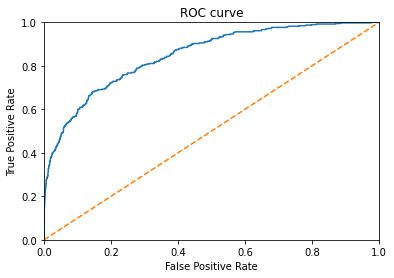

In [534]:
fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

### Test Model:

#### Random Forest Test

In [535]:
predicted_proba = boost_model.predict_proba(encode_features_test)
predicted_test = (predicted_proba[:,1] >= best_threshold).astype('int')
f1 = f1_score(target_test,predicted_test)
f1

0.6405090137857901

In [536]:
predicted_test = boost_model.predict(encode_features_test)
f1 = f1_score(target_test,predicted_test)
f1

0.6390899689762151

We get an f1 test score well over our threshold of 0.59 with and without adjusting the threshold to 0.52.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

We got F1 > 0.59! Well done!
</div>

# Conclusion:
- Of the 4 models tested (logistic regression, decision trees, random forest, gradient boost) the Gradient Boosting Classifier performed the best with a 0.63 f1 score on the test dataset.
- To overcome the class imbalance for the target (Exited), I downsampled the more prevalent class (0). 
- To optimize the model, I adjusted the hyperparameters for the number of estimators (n_estimators) and the maximum tree depth (max_depth).

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good final conclusion.
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

James, thank you for sending your project. You've done a really good job on it!
    
Especially impressed:

- high code level

- good project structure
    
- step with threshold adjustment
    
I'm glad to say that your project has been accepted. Keep up the good work, and good luck on the next sprint!
</div>